# Project 2:  Holiday weather

by Ivana Gramatikova, 19 Decembber 2017, 


Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

In [102]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
capetown = read_csv('CapeTown_CPT_2014.csv', skipinitialspace=True)

## Cleaning the data
First we need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in my analysis, but you might in yours so we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

In [103]:
capetown = capetown.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

remove the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column. 

In [104]:
capetown['WindDirDegrees'] = capetown['WindDirDegrees'].str.rstrip('<br />')

and change the values in the `'WindDirDegrees'` column to `float64`:

In [105]:
capetown['WindDirDegrees'] = capetown['WindDirDegrees'].astype('float64')   

We definitely need to change the values in the `'GMT'` column into values of the `datetime64`  date type.

In [106]:
capetown['Date'] = to_datetime(capetown['Date'])

We also need to change the index from the default to the `datetime64` values in the `'GMT'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs: 

In [107]:
capetown.index = capetown['Date']

## Finding a summer break

According to meteorologists, summer extends for the whole months of June, July, and August in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. So as I'm in the northern hemisphere I'm going to create a dataframe that holds just those months using the `datetime` index, like this:

In [108]:
summer = capetown.loc[datetime(2014,1,1) : datetime(2014,2,20)]

I now look for the days with warm temperatures.

In [109]:
summertem=summer[(summer['Mean TemperatureC'] <= 25)]
summertem.head(7)

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,28,23,18,19,17,15,88,71,45,...,19,14,10,35,14,NaN,0.00,2,NaN,213
2014-01-02,2014-01-02,28,23,18,19,18,16,88,74,46,...,26,13,10,32,21,NaN,0.00,2,NaN,204
2014-01-03,2014-01-03,27,23,19,19,18,18,94,75,48,...,31,12,3,32,26,NaN,0.00,4,NaN,193
2014-01-04,2014-01-04,27,22,18,19,18,14,88,74,46,...,26,13,9,32,18,NaN,0.00,3,NaN,314
2014-01-05,2014-01-05,26,22,18,17,16,14,83,70,46,...,26,13,10,45,21,NaN,0.00,4,Rain,25
2014-01-06,2014-01-06,26,22,18,19,16,14,94,78,61,...,26,11,4,42,18,NaN,6.10,6,Rain,171
2014-01-07,2014-01-07,24,21,18,18,17,16,88,77,59,...,31,12,10,45,29,NaN,2.03,4,Rain,162


So next we tell Jupyter to display any graph created inside this notebook:

In [110]:
%matplotlib inline

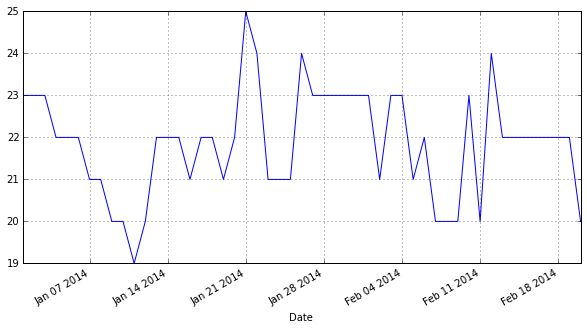

In [111]:
summertem['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

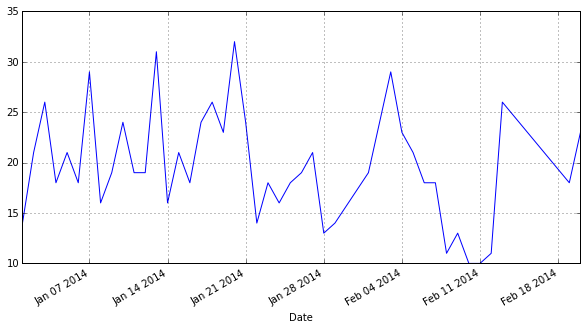

In [112]:
summertem['Mean Wind SpeedKm/h'].plot(grid=True, figsize=(10,5))

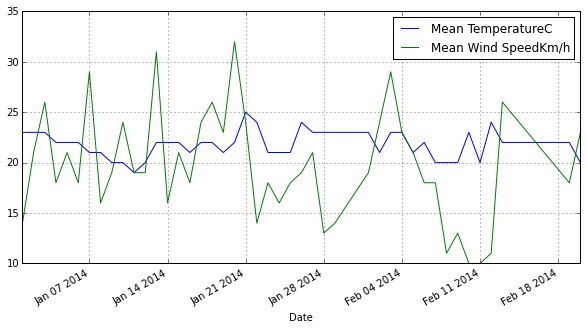

In [113]:
summertem[['Mean TemperatureC', 'Mean Wind SpeedKm/h',]].plot(grid=True, figsize=(10,5))

The second half of January is still looking good. Let's have a closer look by just plotting mean temperature and Mean Wind SpeedKm/h for January.  

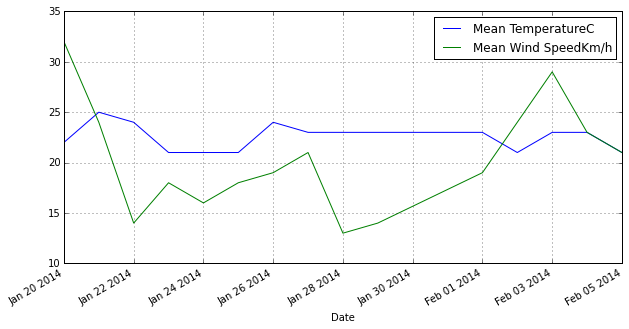

In [114]:
january = summertem.loc[datetime(2014,1,20) : datetime(2014,2,5)]
january[['Mean TemperatureC', 'Mean Wind SpeedKm/h']].plot(grid=True, figsize=(10,5))

Yes, second half of January looks pretty good, just two days that have significant wind. 

## Conclusions

The graphs have shown the volatility of a Cape Town summer, but a couple of weeks were found when the weather is too great in 2014. Of course this is no guarantee that the weather pattern will repeat itself in future years. To make a sensible prediction we would need to analyse the summers for many more years.